# Table of Contents

---
* [Imports](#ana_over)
* [Functions](#func)
* [File Access](#f_acc)
* [Calculations](#calc)
    * [Brier Skill Score](#bss)
    * [Mean Bias](#mb)
    * [Anomaly Correlation Coefficient](#acc)

# Imports <a class="anchor" id="imports"></a>

In [16]:
# import necessary libraries
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#import cftime
import calendar
import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import numpy as np
import glob
import matplotlib.colors as mc
from matplotlib import colors

# Functions <a class="anchor" id="func"></a>

In [2]:
def getspecificmon(dt_lst, mon = 1):
    """
    Gets all files corresponding to a specific month from all data files of a given variable
    
    Required inputs:
        ds_lst          (list of string) = list of paths for all date files corresponding to a given variable
        mon                        (int) = integer corresponding to the month i.e Mar = 3 (default is 1 = Jan)
        
    Outputs:
        new_ds_lst              (list) = A list of path corresponding to files for that chosen mon
    """
    new_ds_lst = []
    
    for pth in dt_lst:
        if (int(pth[-5:-3]) == mon):
            new_ds_lst.append(pth)
        
    return new_ds_lst

In [3]:
def openfiles(dt_lst):
    """
    Open all files in pathway list with Datetime64 datetime formats
    
    Required inputs:
        ds_lst          (list of string) = list of paths for all date files corresponding to a given variable
        
    Outputs:
        dset              (xarray) = Open xarray dataset with corresponding times 
    """
    
    #final_xr = xr.DataArray()
    first = True
    
    for dat in dt_lst:
        yr = int(dat[-9:-5])
        mon = int(dat[-5:-3])
        day = 1
        strt_time = dt.datetime(yr, mon, day)
        
        date_lst = [strt_time]
        for timestep in list(range(1,12)):
            date_after_month = strt_time + relativedelta(months=timestep)
            #print(date_after_month)
            date_lst.append(date_after_month)
            
            
        for i in list(range(0,len(date_lst))):
            date_lst[i] = np.datetime64(date_lst[i])
                
        #print(date_lst)
        ds_ent = xr.open_dataset(dat, decode_times=False)
        ds_ent['time'] = ("time", date_lst)
        #print(ds_ent)
        
        if (first == True):
            final_xr = ds_ent
            first = False
        else:
            final_xr = xr.concat([final_xr,ds_ent], dim='time')
            
    return final_xr

# File Access <a class="anchor" id="f_acc"></a>

In [4]:
fpath = "../../Desktop/projects/COLA/CLIM751" # set path of data

In [5]:
# extract all precipitation rate (prate) files and put them into a list
dt_lst_prate = glob.glob(f"{fpath}/data/monthly/prate/prate_*.nc")
dt_lst_prate.sort() # sort files by date

In [6]:
# print list of prate files 
dt_lst_prate

['../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198001.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198004.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198007.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198010.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198101.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198104.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198107.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198110.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198201.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198204.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198207.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198210.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198301.nc',
 '../../Desktop/projects/

In [7]:
# get January files for all years of data
jan_ds = getspecificmon(dt_lst_prate, mon=1)

In [8]:
# display list of January files
jan_ds

['../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198001.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198101.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198201.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198301.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198401.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198501.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198601.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198701.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198801.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_198901.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_199001.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_199101.nc',
 '../../Desktop/projects/COLA/CLIM751/data/monthly/prate/prate_199201.nc',
 '../../Desktop/projects/

In [9]:
# open list of files
jan_dt = openfiles(jan_ds)

In [10]:
ds = xr.open_dataset(dt_lst_prate[0], decode_times=False)

In [11]:
# display dataset of concatenated January data files
jan_dt

<xarray.Dataset> Size: 2GB
Dimensions:  (ens: 21, time: 420, lat: 180, lon: 360)
Coordinates:
  * ens      (ens) float64 168B 1.0 2.0 3.0 4.0 5.0 ... 17.0 18.0 19.0 20.0 21.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[us] 3kB 1980-01-01 1980-02-01 ... 2014-12-01
Data variables:
    prate    (ens, time, lat, lon) float32 2GB nan nan nan nan ... nan nan nan

In [12]:
jan_dt['prate'][3,20,20,6]

<xarray.DataArray 'prate' ()> Size: 4B
array(1.9031448, dtype=float32)
Coordinates:
    ens      float64 8B 4.0
    lat      float64 8B -69.5
    lon      float64 8B 6.5
    time     datetime64[us] 8B 1981-09-01
Attributes:
    units:      mm/day
    long_name:  Precipitation rate

# Calculations

### Brier Skill Score <a class="anchor" id="bss"></a>



<center>
 $BSS = 1 - \frac{BS}{BS_c}$

where: <br>
$BS$ = the Brier score (below) <br>
$BS_c$ = the expected value of the Brier score based on climatology.


<center>
 $BS = \frac{1}{N}\sum_{i=1}^{N}{(p_f - p_o)_l}^2$

    
where:    
$p_{fi}$ = probability in event in forecast i <br>
$p_{oi}$ = probability of event in observation i <br>
    
for: <br>
threshold1 = 0.5 mm/day <br>
threshold2 = 5 mm/day

In [13]:
def BSS(month, thres, mon_mean):
    """
    Calculates Brier Skill Score using reforecasts for monthly mean 'mon_mean' (initialized in month 'month') and plot on world map.
    
    Required inputs:
        month          (list of int) = list of integers [1,12] corresponding to initialization month of reforecasts used to calculate BSS
        thres        (list of float) = list of thresholds for BSS calculation
        mon_mean               (int) = monthly mean over which the BSS is calculated
        
    Outputs:
        none 
    """
    
    # iterate through months in input list
    for mn in month:
        
        mn_lst_prate = getspecificmon(dt_lst_prate, mon=mn) # Get all files with for month mn
        
        # iterate through threshold list
        for ths in thres:
        
            mn_dt_prate = openfiles(mn_lst_prate) # open files into one xarray
            mn_dt_prate = mn_dt_prate.where(mn_dt_prate.time.dt.month.isin([mn+mon_mean]), drop=True) # drop all data for months not monthly mean (mon_mean)
        
            E = len(mn_dt_prate.ens) - 1 # get number of forecast ensembles
        
            ###################################### Calculate Brier Score (Numerator) #########################################################
            # For each time and ensemble, mark the values below the threshold as 0
            # and the ones above as 1
            for count, tim in enumerate(mn_dt_prate.time[:]):
                for ens in list(range(0, E)):
                    mn_dt_prate['prate'][ens,count,:,:] = mn_dt_prate['prate'][ens,count,:,:].where(mn_dt_prate['prate'][ens,count,:,:] >= ths, other=0)
                    mn_dt_prate['prate'][ens,count,:,:] = mn_dt_prate['prate'][ens,count,:,:].where(mn_dt_prate['prate'][ens,count,:,:] == 0, other=1)
            
            mn_dt_sum = mn_dt_prate['prate'][0:20, :,:,:].sum(dim="ens") # take the sume of the first 20 ensemslbes
            mn_event_prob = mn_dt_sum/20 # calculate the event prob p_f for BSS
        
            mn_dt_prob = mn_dt_prate['prate'][20,:,:,:].where(mn_dt_prate['prate'][20,:,:,:] >= ths, other=0) # Set obs. below threshold to 0
            mn_obs_prob = mn_dt_prob.where(mn_dt_prob== 0, other=1) # Set obs above threshold to 1
        
            BS = (1/len(mn_event_prob.time)) * ((((mn_event_prob - mn_obs_prob)**2)).sum(dim='time')) # calculate Brier Score
        
            ###################################### Calculate Brier Score of the Climatology (Denominator) ####################################
        
            mn_clim_prob = mn_event_prob.sum(dim='time')/len(mn_event_prob.time) # calculate forecast climatology for Brier Score Clim.
        
            BSC = (1/len(mn_obs_prob.time)) * ((((mn_clim_prob - mn_obs_prob)**2)).sum(dim='time')) # calculate the expected Brier Score
        
            BSS = 1 - (BS/BSC) # Calculate Brier Skill Score
        
            ################################################## Plot Figure ####################################################################
        
            clevs=np.arange(-0,1,.2) # define contour levels
            fig = plt.figure(figsize=(11,8.5)) # instantiate figure 
            ax=plt.axes(projection=ccrs.Robinson()) # set the axis to a Robinson projection
            # plot BSS values on defined clevels at with the associated geography (lat, lon) data
            cs=ax.contourf(BSS.lon, BSS.lat, 
                       BSS.values,clevs,
                       transform = ccrs.PlateCarree(),cmap='RdBu',
                       extend='both')
            ax.coastlines() # add coastlines to plot
            ax.gridlines() # add gridlines to plot
            # configure colorbar
            cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',
                                label='Brier Skill Score')
            # add title
            plt.title(calendar.month_name[mn+mon_mean] + " BSS for threshold of " + str(ths) + " mm/day")
            fignm = "BSS_mn" + str(mn+mon_mean) + "_" + str(ths) + ".png" # figure name
            plt.savefig(fignm) # save figure under figure name
        
        

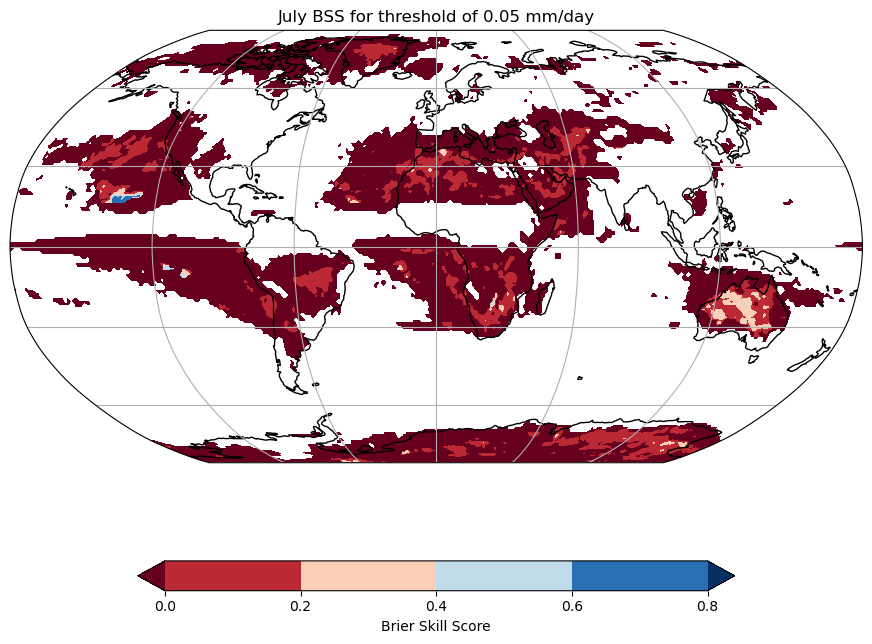

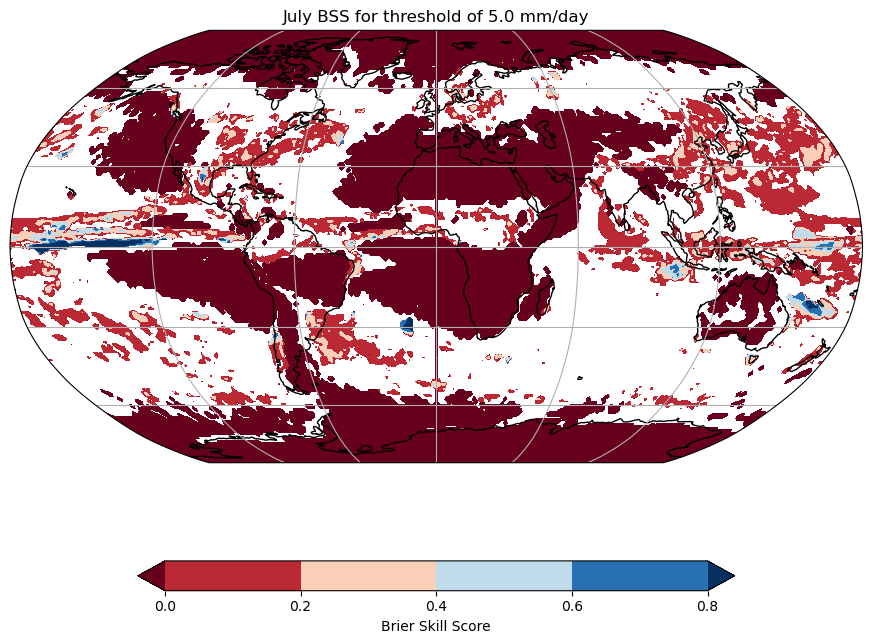

In [14]:
# plot BSS for monthly mean 0 (July) of reforecast data initialized in July using thresholds of 0.05 and 5
BSS([7], [0.05, 5.0], 0)

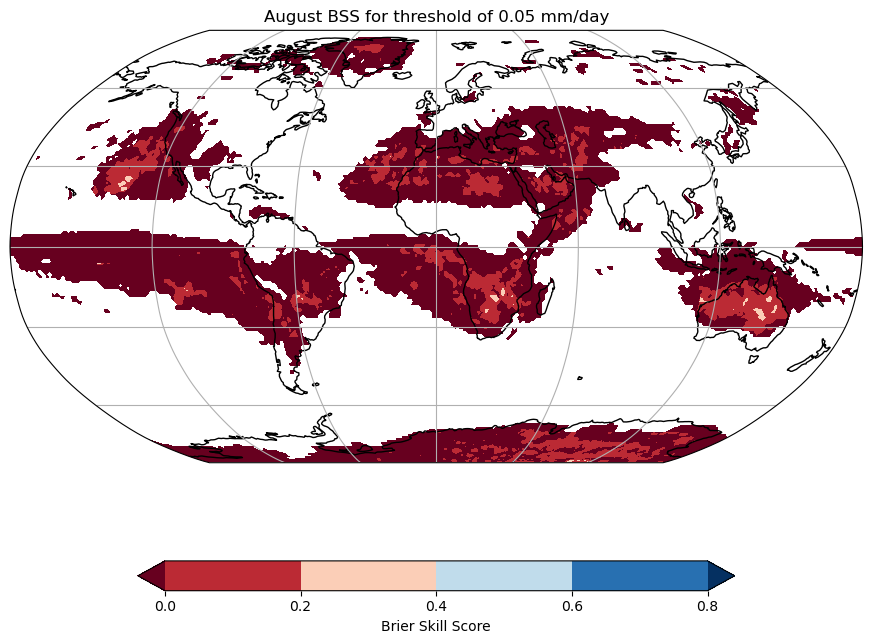

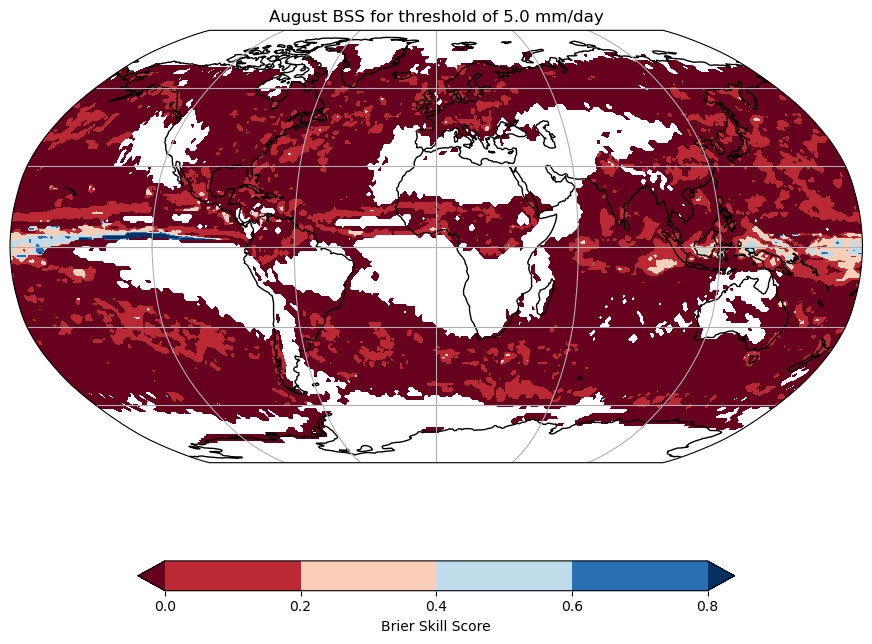

In [15]:
# plot BSS for monthly mean 1 (August) of reforecast data initialized in July using thresholds of 0.05 and 5
BSS([7], [0.05, 5.0], 1)

### Mean Bias<a class="anchor" id="mb"></a>

The mean value of deviations between forecasts and verification values

<center>
 $MB_i = \overline{[<f_i> - o_k]}$ 

where:<br>
${f_i}$ = forecast <br>
${o_k}$ = observations 

In [17]:
def MeanBias(month):
    
    """
    Calculates Mean Bias of precipitaion rate using reforecasts initialized for month "month" and and average 
    of months 0 and 1 and season 0 and 1 relative to the initialization month. Plots results on a world map.
    
    Required inputs:
        month          (list of int) = list of integers [1,12] corresponding of months of the year to calculate MB
        
    Outputs:
        none 
    """
    
    levels = np.linspace(-1, 500, 100) # define contour levels
    divnorm=colors.TwoSlopeNorm(vmin=-12, vcenter=0, vmax=12) # define colors for plotting
    
    #Get variable list for January and July for different variables
    dt_lst_prate = glob.glob(f"{fpath}/data/monthly/prate/prate_*.nc")
    dt_lst_prate.sort() # Sort files by date
    
    mn_lst_prate = getspecificmon(dt_lst_prate, mon=month) # Get all files with specified month
    dt_prate = openfiles(mn_lst_prate) #Open all files with specified month
    
    #Get monthly and seasonal data
    mn_mon0 = dt_prate.where(dt_prate.time.dt.month.isin([month]), drop=True) # Get data for monthly mean 0 of given month
    mn_mon1 = dt_prate.where(dt_prate.time.dt.month.isin([month+1]), drop=True) # Get data for monthly mean 1 of given month
    mn_sea0 = dt_prate.where(dt_prate.time.dt.month.isin([month,month+1,month+2]), drop=True) # Get data for seasonal mean 0 of given month
    mn_sea1 = dt_prate.where(dt_prate.time.dt.month.isin([month+3,month+4,month+5]), drop=True) # Get data for seasonal mean 0 of given month    
    
    #Calculate monthly and seasonal mean
    for dat, figre in zip([mn_mon0, mn_mon1, mn_sea0, mn_sea1], ["Month 0", "Month 1", "Season 0", "Season 1"]):
        
        dat_fore = dat['prate'][0:20,:,:,:].mean(dim='ens').mean(dim='time') # average prate over each ensemble and time
        dat_obs = dat['prate'][20,:,:,:].mean(dim='time') # average prate over time for the final ensemble
        
        dat_mb = dat_fore - dat_obs # calculate mean bias
         
        #clevs=np.arange(-13,15,2)    
        fig = plt.figure(figsize=(11,8.5)) # instantiate figure
        ax=plt.axes(projection=ccrs.Robinson()) # define projection
        # plot mb
        cs=ax.contourf(dat_mb.lon, dat_mb.lat, 
                   dat_mb.values, [-12, -10, -8, -6, -4,-2,0,2,4,6,8,10,12 ],
                   transform = ccrs.PlateCarree(),cmap='seismic',
                   extend='both', norm=divnorm)
        ax.coastlines() # add coastlines
        ax.gridlines() # add gridlines
        # add colorbar
        cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',
                            label='Mean Bias')
        plt.title("Precipitation Rate Mean Bias for " + str(calendar.month_name[month]) + " " + figre) # add title
        plt.savefig("mb_prate_" + "mn" + str(month) + figre) # save figure
                        
    
    

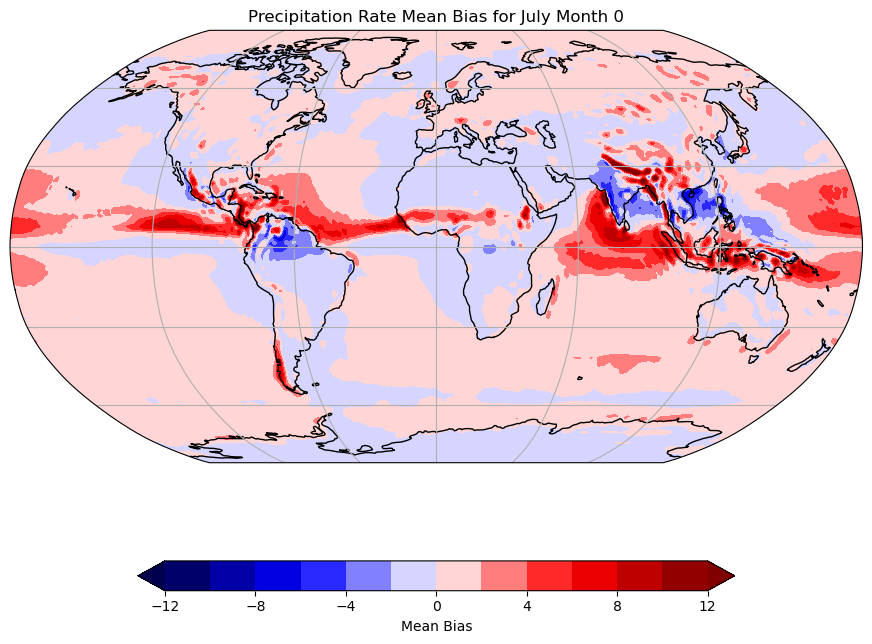

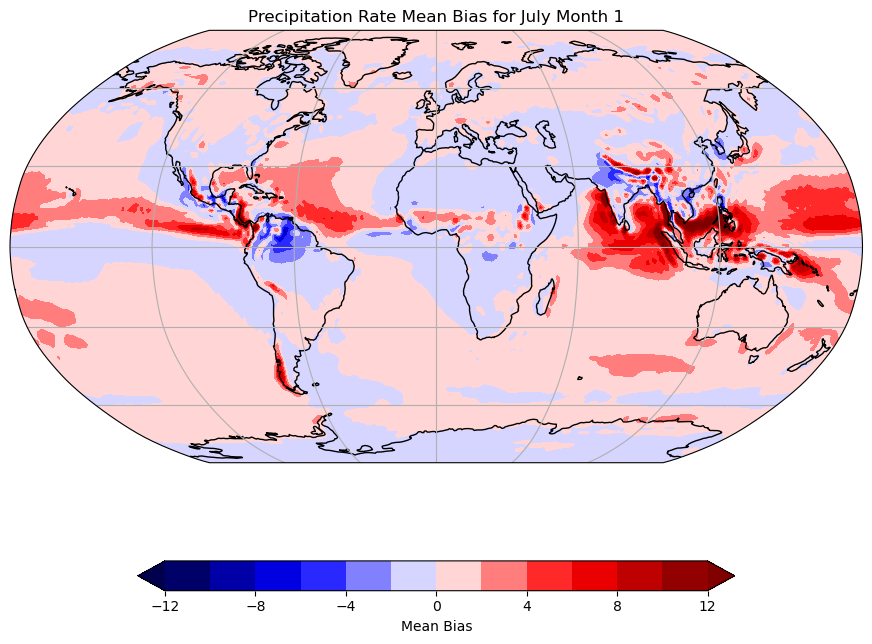

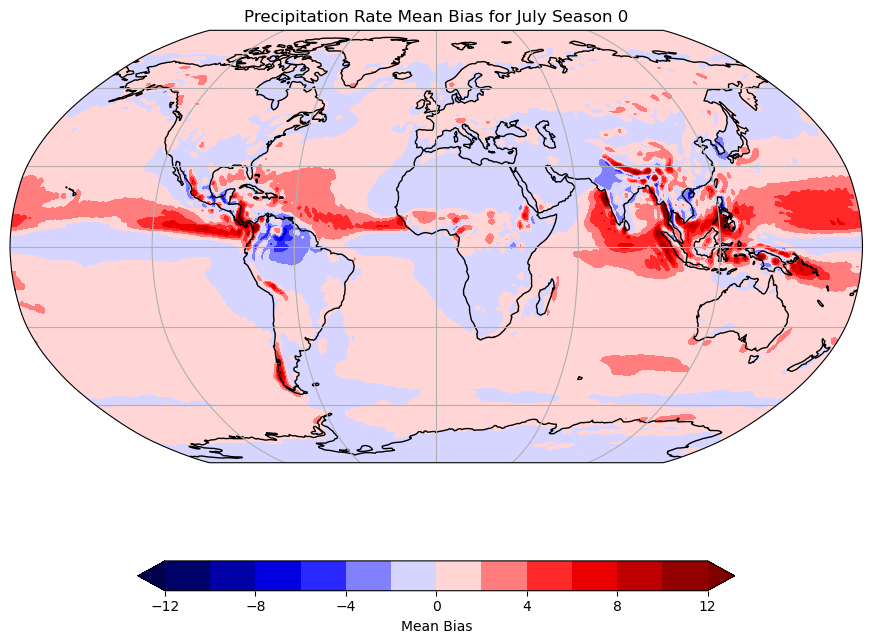

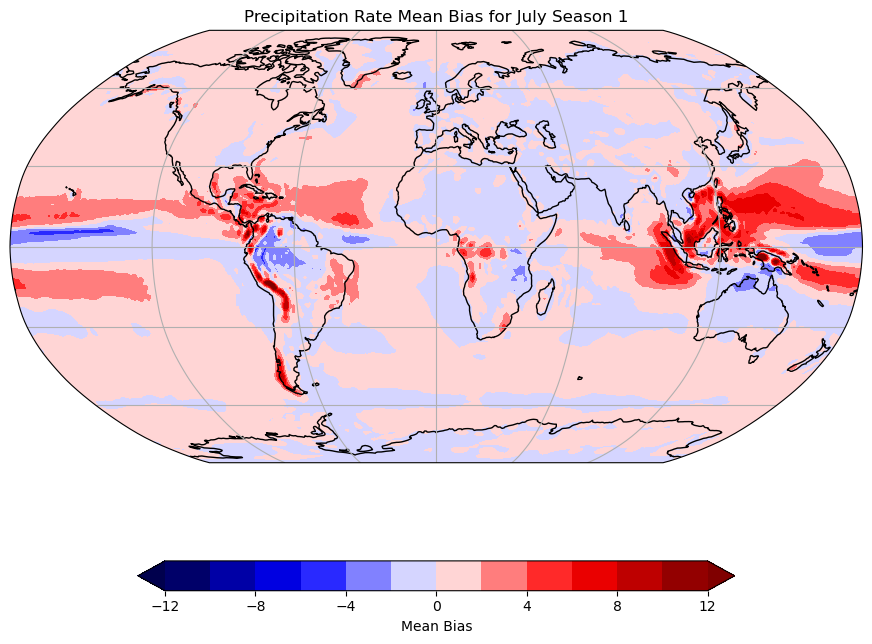

In [18]:
# calculate the mb for data reforecasts initialized in July
MeanBias(7)

### Anomaly Correlation Coefficient<a class="anchor" id="acc"></a>

"The spatial correlation between a forecast anomaly relative to climatology and a verifying analysis relative to climatology (confluence.ecmwf.int)"

   * How well forecast anomalies represent observed anomalies
   * Values lie between -1 and 1
     - +1 : Good agreement and the forecast anomaly has value
     - 0.5 : Forecast errors like those of forecast based on climatological average
     - 0: Poor agreement and forecast has no value
     - -1: Agreement is in anti-phase and forecast has been unreliable
     
<center>
 $ACC_i = \frac{N}{N-1}\overline{\frac{(\langle f_l \rangle - \langle \overline{f_l} \rangle)(o_k - \overline{o})}{\sigma_f \sigma_o}}$ 

where:<br>
${f_i}$ = forecast <br>
${o_k}$ = observations 

In [21]:
def ACCprate(month):
    
    """
    Calculates anomaly correlation coefficient of precipitation rates using reforecasts initialized for month "month" and and average 
    of months 0 and 1 and season 0 and 1 relative to the initialization month. Plots results on a world map.
    
    Required inputs:
        month          (list of int) = list of integers [1,12] corresponding of months of the year to calculate MB
        
    Outputs:
        none 
    """
    
    #Get variable list for January and July for different variables
    dt_lst_prate = glob.glob(f"{fpath}/data/monthly/prate/prate_*.nc")
    dt_lst_prate.sort() # Sort files by date
    
    mn_lst_prate = getspecificmon(dt_lst_prate, mon=month) # Get all files with specified month
    dt_prate = openfiles(mn_lst_prate) #Open all files with specified month
    
    #Get monthly and seasonal data
    mn_mon0 = dt_prate.where(dt_prate.time.dt.month.isin([month]), drop=True) # Get data for monthly mean 0 of given month
    mn_mon1 = dt_prate.where(dt_prate.time.dt.month.isin([month+1]), drop=True) # Get data for monthly mean 1 of given month
    mn_sea0 = dt_prate.where(dt_prate.time.dt.month.isin([month,month+1,month+2]), drop=True) # Get data for seasonal mean 0 of given month
    mn_sea1 = dt_prate.where(dt_prate.time.dt.month.isin([month+3,month+4,month+5]), drop=True) # Get data for seasonal mean 0 of given month    
    
    #Calculate monthly and seasonal mean
    for dat, figre in zip([mn_mon0, mn_mon1, mn_sea0, mn_sea1], ["Month 0", "Month 1", "Season 0", "Season 1"]):
        
        dat_fore_ens_mean = dat['prate'][0:20,:,:,:].mean(dim='ens') # average data over ensembles
        dat_fore_tim_ens_mean = dat['prate'][0:20,:,:,:].mean(dim='ens').mean(dim='time') # average data over ensembles and time
        dat_obs_tim_mean = dat['prate'][20,:,:,:].mean(dim='time') # average observations over time
        dat_fore_std = dat_fore_ens_mean.std(dim='time') # std across time of ensemble average
        dat_obs_std = dat['prate'][20,:,:,:].std(dim='time') # std across time of observations
        
        N = len(dat.time) # number of times
        
        acc = N/(N-1) * (((dat_fore_ens_mean-dat_fore_tim_ens_mean)*(dat['prate'][20,:,:,:]-dat_obs_tim_mean))/(dat_fore_std*dat_obs_std)).mean(dim='time') # ACC
         
        clevs=np.arange(-1,1.2,.2) # define contour levels    
        fig = plt.figure(figsize=(11,8.5)) # create figure
        ax=plt.axes(projection=ccrs.Robinson()) # define projection
        # plot ACC
        cs=ax.contourf(acc.lon, acc.lat, 
                   acc.values, clevs,
                   transform = ccrs.PlateCarree(),cmap='RdBu',
                   extend='both')
        ax.coastlines() # add coastlines
        ax.gridlines() # add gridlines
        # add colorbar
        cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',
                            label='ACC')
        plt.title("Precipitation Rate Anomaly Correlation Coefficient for " + str(calendar.month_name[month]) + " " + figre) # set title of figure
        plt.savefig("acc_prate_" + "mn" + str(month) + figre) # save figure
                        
    
    

/home/bdavis39/miniconda3/envs/clim751/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bdavis39/miniconda3/envs/clim751/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bdavis39/miniconda3/envs/clim751/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bdavis39/miniconda3/envs/clim751/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bdavis39/miniconda3/envs/clim751/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: De

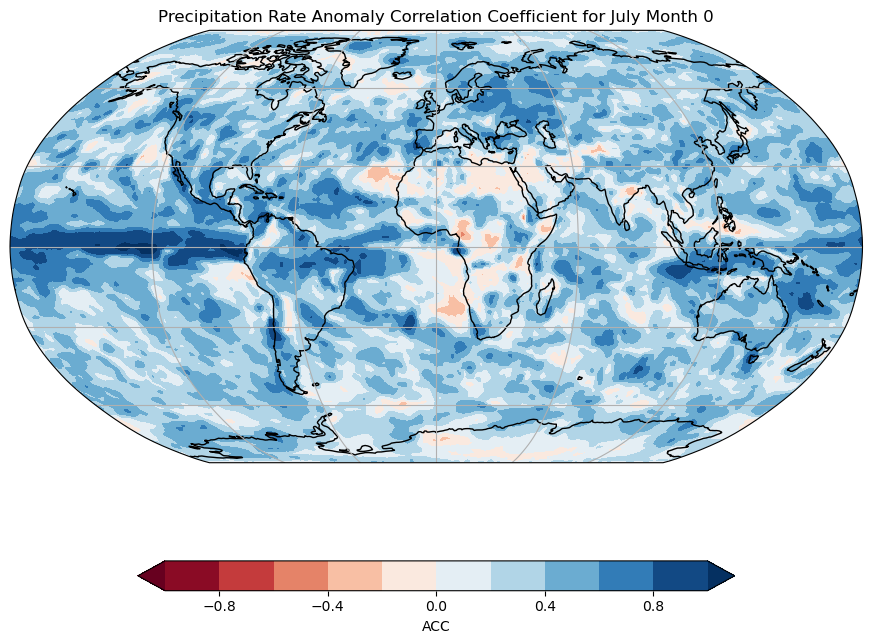

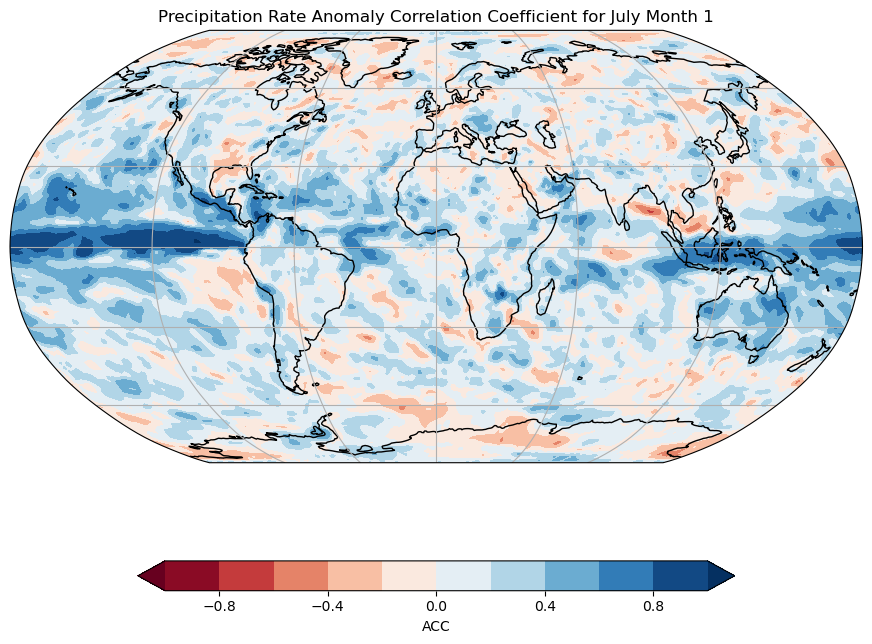

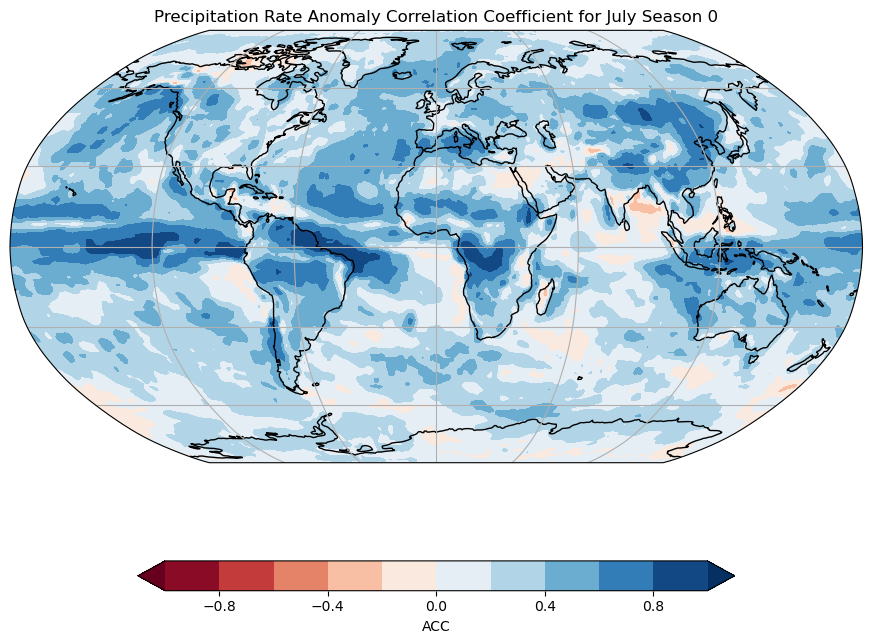

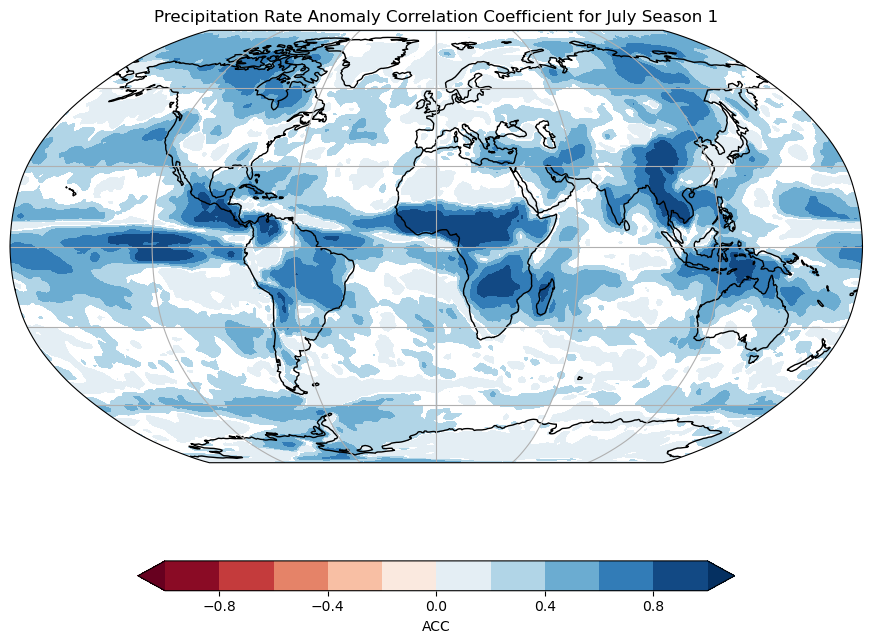

In [22]:
ACCprate(7)